In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

% matplotlib inline


#Бета-распределение

##Определение функции

В качесте распределения принято бета-распределение. 
В соответствии с Википедией:
Бе́та-распределе́ние в теории вероятностей и статистике — двухпараметрическое семейство абсолютно непрерывных распределений. Используется для описания случайных величин, значения которых ограничены конечным интервалом. a и b - параметры распределения

In [2]:
a, b = 2., 5.

Из Wikipedia - $\alpha$ > 1,$\beta$ > 1 — график унимодальный;

In [3]:
x = np.linspace(sts.beta.ppf(0.01, a, b), sts.beta.ppf(0.99, a, b), 1000)
pdf = sts.beta.pdf(x, a, b)

sts.beta.ppf - возвращает значение х для q ("хвостовое" значение вероятности). 
pdf - Probability density function (расчет значений по функции плотности)

In [4]:
r = sts.beta.rvs(a, b, size=1000)

beta.rvs - генерация случайных точек


##График

График и гистограмму генерируем на основе http://matplotlib.org/examples/statistics/histogram_demo_features.html

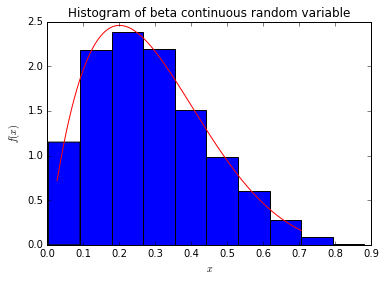

In [5]:
plt.hist(r, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.plot(x, pdf, 'r-')
plt.title(r'Histogram of beta continuous random variable')
plt.subplots_adjust(left=0.15)

Wikipedia не соврала: график имеет 1 моду и мода смещена от центра.

#Гистограммы средних значений

Для нескольких значений n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних.

In [6]:
n_point = [5, 10, 50]
n_sample = 1000


Генерируем список, содержащий список средних значений. Генерацию точек выполняем через sts.beta.rvs(a, b, size=number_point)

In [7]:
list_x_mean_point = []
for number_point in n_point:
    x_mean = []
    for n in range(n_sample):
        x_mean_point = np.mean(sts.beta.rvs(a, b, size=number_point))
        x_mean.append(x_mean_point)
    list_x_mean_point.append(x_mean)


In [8]:
len(list_x_mean_point[0]), len(list_x_mean_point)


(1000, 3)

#Распределение средних значений в соответствии с центральной предельной теореме

Определим среднее значение и дисперсию. Сначало через scipy.

In [9]:
mean, var = sts.beta.stats(a, b, moments='mv')

In [10]:
print "Среднее - ", mean, "Дисперсия - ", var

Среднее -  0.285714285714 Дисперсия -  0.0255102040816


Потом по данным wikipedia

In [11]:
mean_theor = a*1.0/(a+b)
var_theor = (a*b)/((a+b)**2*(a+b+1))

In [12]:
print "Среднее теоретическое - ", mean_theor, "Дисперсия теоретическая - ", var_theor

Среднее теоретическое -  0.285714285714 Дисперсия теоретическая -  0.0255102040816


Определяем функция нормального распределения, где среднее = mean, а дисперсия =  (var/n_point)**0.5

In [13]:
list_x_norm = []
list_y_norm = []
for n in n_point:
    norm_rv = sts.norm(mean, (var / n) ** 0.5)
    x_norm = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
    y_norm = norm_rv.pdf(x_norm)
    list_x_norm.append(x_norm)
    list_y_norm.append(y_norm)


## Графики и гистограммы сравнения 

Для начала выведу все 3 графика вместе

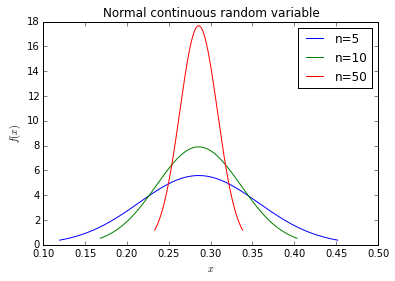

In [94]:
for n in range(len(n_point)):
    plt.plot(list_x_norm[n], list_y_norm[n], label='n=' + str(n_point[n]))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Normal continuous random variable')
plt.legend()


Функция для совместного вывода гистограммы среднего и по плотности нормального распределения

In [14]:
def plot_graph(n):
    plt.hist(list_x_mean_point[n], normed=True)
    plt.plot(list_x_norm[n], list_y_norm[n], label="Normal distr.")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('Histogram of mean N=' + str(n_point[n]))
    plt.legend()


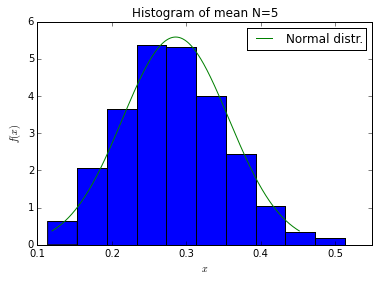

In [96]:
plot_graph(0)

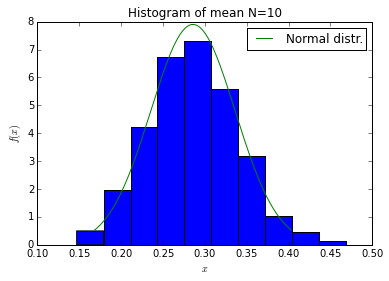

In [97]:
plot_graph(1)

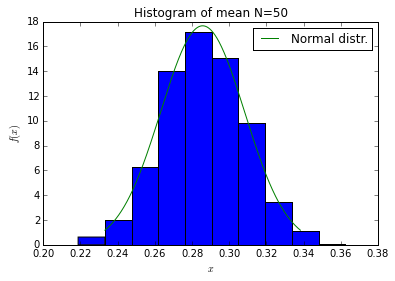

In [98]:
plot_graph(2)

#Выводы

Целью этого задания была проверка работы центральной предельной теоремы. 
Выполненные вычисления показывают хорошую сходимость расчетного распределения средних значений с "опытными данными". При увеличении числа точек, по которым берется среднее, график "вытягивается" вверх. Спасибо yandex))